# Multiple Input Agent

this agent is taking a list of integers whose sum is the age of another parameter passing as name.


In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [4]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    message : str

In [5]:
def multi_process(state : AgentState) -> AgentState:
    """The state action handles multiple values and finding age by adding numbers from a list"""
    state["message"] = f"Hey {state["name"]}, your age is {sum(state["values"])}."
    return state

In [6]:
graph = StateGraph(AgentState)
graph.add_node("age_calculator", multi_process)
graph.set_entry_point("age_calculator")
graph.set_finish_point("age_calculator")

app = graph.compile()

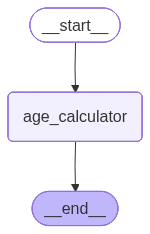

In [8]:
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
result = app.invoke({"name" : "Gaurav", "values" : [1,2,3,4,5,6,7]})
result["message"]

'Hey Gaurav, your age is 28.'